# My health data analysis

### Data import and preparation

In [184]:
import pandas as pd #version 1.4.2
import matplotlib.pyplot as plt #version 3.5.1

In [185]:
# Reading data to DataFrame from .xml file
df1 = pd.read_xml("D:/apple_health_export/export.xml")
df1.head(5)

,value,HKCharacteristicTypeIdentifierDateOfBirth,HKCharacteristicTypeIdentifierBiologicalSex,HKCharacteristicTypeIdentifierBloodType,HKCharacteristicTypeIdentifierFitzpatrickSkinType,HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse,type,sourceName,sourceVersion,unit,...,dateComponents,activeEnergyBurned,activeEnergyBurnedGoal,activeEnergyBurnedUnit,appleMoveTime,appleMoveTimeGoal,appleExerciseTime,appleExerciseTimeGoal,appleStandHours,appleStandHoursGoal
0,2022-12-30 13:13:01 +0300,None,None,None,None,None,None,None,None,None,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1,None,2003-01-17,HKBiologicalSexMale,HKBloodTypeNotSet,HKFitzpatrickSkinTypeNotSet,None,None,None,None,None,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
2,185.42,None,None,None,None,None,HKQuantityTypeIdentifierHeight,iPhone,16.0,cm,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
3,61,None,None,None,None,None,HKQuantityTypeIdentifierBodyMass,iPhone,16.0,kg,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4,42,None,None,None,None,None,HKQuantityTypeIdentifierStepCount,iPhone,14.3,count,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
# Viewing the list of column names
df1.columns

Index(['value', 'HKCharacteristicTypeIdentifierDateOfBirth',
       'HKCharacteristicTypeIdentifierBiologicalSex',
       'HKCharacteristicTypeIdentifierBloodType',
       'HKCharacteristicTypeIdentifierFitzpatrickSkinType',
       'HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse', 'type',
       'sourceName', 'sourceVersion', 'unit', 'creationDate', 'startDate',
       'endDate', 'device', 'MetadataEntry', 'dateComponents',
       'activeEnergyBurned', 'activeEnergyBurnedGoal',
       'activeEnergyBurnedUnit', 'appleMoveTime', 'appleMoveTimeGoal',
       'appleExerciseTime', 'appleExerciseTimeGoal', 'appleStandHours',
       'appleStandHoursGoal'],
      dtype='object')

In [187]:
# Extracting only columns that have valuable data for further analysis
df = df1[['creationDate', 'startDate', 'endDate', 'type', 'value', 'unit', 'sourceName', 'device']]
df.head(10)

,creationDate,startDate,endDate,type,value,unit,sourceName,device
0,None,None,None,None,2022-12-30 13:13:01 +0300,None,None,None
1,None,None,None,None,None,None,None,None
2,2022-09-16 20:04:19 +0300,2022-09-16 20:04:19 +0300,2022-09-16 20:04:19 +0300,HKQuantityTypeIdentifierHeight,185.42,cm,iPhone,None
3,2022-09-16 20:04:19 +0300,2022-09-16 20:04:19 +0300,2022-09-16 20:04:19 +0300,HKQuantityTypeIdentifierBodyMass,61,kg,iPhone,None
4,2021-02-27 09:59:10 +0300,2021-02-27 09:32:57 +0300,2021-02-27 09:32:57 +0300,HKQuantityTypeIdentifierStepCount,42,count,iPhone,"<<HKDevice: 0x281054eb0>, name:iPhone, manufac..."
5,2021-02-27 11:03:19 +0300,2021-02-27 10:51:27 +0300,2021-02-27 10:55:16 +0300,HKQuantityTypeIdentifierStepCount,85,count,iPhone,"<<HKDevice: 0x281054eb0>, name:iPhone, manufac..."
6,2021-02-27 11:45:55 +0300,2021-02-27 11:20:31 +0300,2021-02-27 11:21:27 +0300,HKQuantityTypeIdentifierStepCount,23,count,iPhone,"<<HKDevice: 0x281054eb0>, name:iPhone, manufac..."
7,2021-02-27 12:46:27 +0300,2021-02-27 12:34:44 +0300,2021-02-27 12:35:41 +0300,HKQuantityTypeIdentifierStepCount,88,count,iPhone,"<<HKDevice: 0x281054eb0>, name:iPhone, manufac..."
8,2021-02-27 12:47:30 +0300,2021-02-27 12:35:41 +0300,2021-02-27 12:41:53 +0300,HKQuantityTypeIdentifierStepCount,24,count,iPhone,"<<HKDevice: 0x281054eb0>, name:iPhone, manufac..."
9,2021-02-27 13:05:11 +0300,2021-02-27 12:47:22 +0300,2021-02-27 12:47:27 +0300,HKQuantityTypeIdentifierStepCount,20,count,iPhone,"<<HKDevice: 0x281054eb0>, name:iPhone, manufac..."


In [188]:
# Getting rid of null values
df2 = df.drop(df[(df["value"].isnull()) | (df["creationDate"].isnull()) | (df["device"].isnull())].index)
df2.reset_index(drop=True, inplace = True)

print(df2['type'].value_counts())
print(" ")
print(df2.isnull().any())

HKQuantityTypeIdentifierHeadphoneAudioExposure            22884
HKQuantityTypeIdentifierStepCount                         15648
HKQuantityTypeIdentifierDistanceWalkingRunning            15604
HKQuantityTypeIdentifierWalkingSpeed                      11972
HKQuantityTypeIdentifierWalkingStepLength                 11972
HKQuantityTypeIdentifierWalkingDoubleSupportPercentage     9134
HKQuantityTypeIdentifierBasalEnergyBurned                  8846
HKQuantityTypeIdentifierWalkingAsymmetryPercentage         5855
HKQuantityTypeIdentifierActiveEnergyBurned                 3867
HKQuantityTypeIdentifierFlightsClimbed                     2501
HKQuantityTypeIdentifierAppleWalkingSteadiness               27
Name: type, dtype: int64
 
creationDate    False
startDate       False
endDate         False
type            False
value           False
unit            False
sourceName      False
device          False
dtype: bool


In [189]:
# Checking for correct data types
df2.dtypes

creationDate    object
startDate       object
endDate         object
type            object
value           object
unit            object
sourceName      object
device          object
dtype: object

In [190]:
# Correcting data types
df2 = df2.astype({"type" : 'string', "value" : float, "unit" : 'string', "sourceName" : 'string', "device" : 'string'})
df2["creationDate"] =  pd.to_datetime(df2["creationDate"], yearfirst = True).dt.tz_localize(None)
df2["startDate"] =  pd.to_datetime(df2["startDate"], yearfirst = True).dt.tz_localize(None)
df2["endDate"] =  pd.to_datetime(df2["endDate"], yearfirst = True).dt.tz_localize(None)
df2["date"] = df2["endDate"].dt.date
df2["date"] = pd.to_datetime(df2["date"])
df2.dtypes

creationDate    datetime64[ns]
startDate       datetime64[ns]
endDate         datetime64[ns]
type                    string
value                  float64
unit                    string
sourceName              string
device                  string
date            datetime64[ns]
dtype: object

In [191]:
df2.head(5)

,creationDate,startDate,endDate,type,value,unit,sourceName,device,date
0,2021-02-27 09:59:10,2021-02-27 09:32:57,2021-02-27 09:32:57,HKQuantityTypeIdentifierStepCount,42.0,count,iPhone,"<<HKDevice: 0x281054eb0>, name:iPhone, manufac...",2021-02-27
1,2021-02-27 11:03:19,2021-02-27 10:51:27,2021-02-27 10:55:16,HKQuantityTypeIdentifierStepCount,85.0,count,iPhone,"<<HKDevice: 0x281054eb0>, name:iPhone, manufac...",2021-02-27
2,2021-02-27 11:45:55,2021-02-27 11:20:31,2021-02-27 11:21:27,HKQuantityTypeIdentifierStepCount,23.0,count,iPhone,"<<HKDevice: 0x281054eb0>, name:iPhone, manufac...",2021-02-27
3,2021-02-27 12:46:27,2021-02-27 12:34:44,2021-02-27 12:35:41,HKQuantityTypeIdentifierStepCount,88.0,count,iPhone,"<<HKDevice: 0x281054eb0>, name:iPhone, manufac...",2021-02-27
4,2021-02-27 12:47:30,2021-02-27 12:35:41,2021-02-27 12:41:53,HKQuantityTypeIdentifierStepCount,24.0,count,iPhone,"<<HKDevice: 0x281054eb0>, name:iPhone, manufac...",2021-02-27


In [192]:
# Deleting excessive common prefix in "type" column
df2["type"] = [x.replace("HKQuantityTypeIdentifier", "") for x in df2["type"]]
print(df2.type.value_counts())

HeadphoneAudioExposure            22884
StepCount                         15648
DistanceWalkingRunning            15604
WalkingSpeed                      11972
WalkingStepLength                 11972
WalkingDoubleSupportPercentage     9134
BasalEnergyBurned                  8846
WalkingAsymmetryPercentage         5855
ActiveEnergyBurned                 3867
FlightsClimbed                     2501
AppleWalkingSteadiness               27
Name: type, dtype: int64


## Grouping data

In [193]:
# Some values such as "HeadphoneAudioExposure" level need to be aggreagated using .mean(), since we want to see 
# an average dB value per day
columns_mean = ["HeadphoneAudioExposure", "WalkingSpeed", "WalkingStepLength", "WalkingDoubleSupportPercentage", "WalkingAsymmetryPercentage", "AppleWalkingSteadiness"]
grouped_data_mean = df2[df2["type"].isin(columns_mean)]
grouped_data_mean = grouped_data_mean.groupby(["date", "type"], as_index = False).mean()
grouped_data_mean["yyyy_mm"] = grouped_data_mean["date"].dt.to_period("M")
grouped_data_mean.reset_index(drop=True, inplace = True)
grouped_data_mean.head(7)

,date,type,value,yyyy_mm
0,2021-02-27,HeadphoneAudioExposure,52.571127,2021-02
1,2021-02-27,WalkingAsymmetryPercentage,0.010000,2021-02
2,2021-02-27,WalkingDoubleSupportPercentage,0.270667,2021-02
3,2021-02-27,WalkingSpeed,4.944000,2021-02
4,2021-02-27,WalkingStepLength,78.000000,2021-02
5,2021-02-28,HeadphoneAudioExposure,60.932899,2021-02
6,2021-02-28,WalkingAsymmetryPercentage,0.052727,2021-02


In [194]:
# On the other hand when we group values like "StepCount" it makes much more since to see total steps made per day, 
# so we use .sum() to aggreagate data
columns_sum = ["StepCount", "DistanceWalkingRunning", "BasalEnergyBurned", "ActiveEnergyBurned", "FlightsClimbed"]
grouped_data_sum = df2[df2["type"].isin(columns_sum)]
grouped_data_sum = grouped_data_sum.groupby(["date", "type"], as_index = False).sum()
grouped_data_sum["yyyy_mm"] = grouped_data_sum["date"].dt.to_period("M")
grouped_data_sum.reset_index(drop=True, inplace = True)
grouped_data_sum.head(7)

,date,type,value,yyyy_mm
0,2021-02-27,DistanceWalkingRunning,4.53714,2021-02
1,2021-02-27,FlightsClimbed,7.00000,2021-02
2,2021-02-27,StepCount,6074.00000,2021-02
3,2021-02-28,DistanceWalkingRunning,3.02745,2021-02
4,2021-02-28,FlightsClimbed,3.00000,2021-02
5,2021-02-28,StepCount,4081.00000,2021-02
6,2021-03-01,DistanceWalkingRunning,5.38046,2021-03


# Visualizations

In [195]:
# Extract all the data of needed type to a variable
audio_exposure = grouped_data_mean[grouped_data_mean["type"] == "HeadphoneAudioExposure"]["value"]
# Get all date values assosiated with this data
dates = grouped_data_mean[grouped_data_mean["type"] == "HeadphoneAudioExposure"]["date"]
# Calculate moving average (MA) to smooth out initial data (e.g outliers)
ma_audio_exposure = audio_exposure.rolling(window=7).mean()

#Calculating minimum, mean and maximum values
audio_exposure_min = round(audio_exposure.min(), 2)
audio_exposure_mean = round(audio_exposure.mean(), 2)
audio_exposure_max = round(audio_exposure.max(), 2)

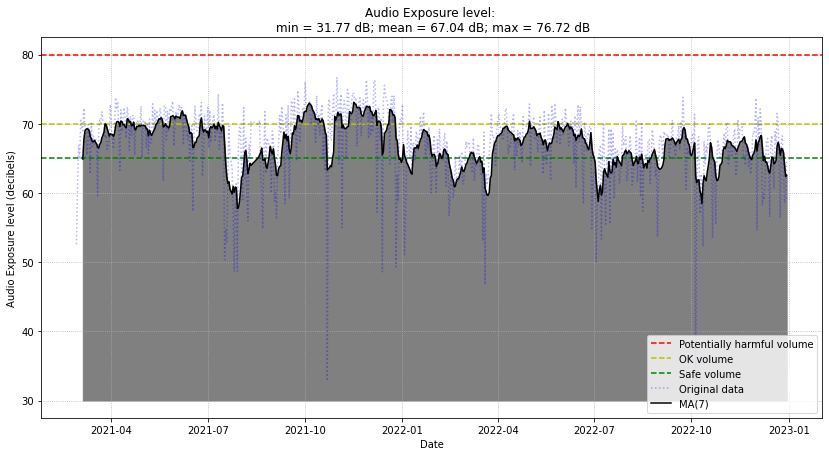

In [196]:
# Plotting the data
plt.figure(figsize=(14, 7))
# Title contains information of plotted data as well as min, mean and max values
plt.title(f"Audio Exposure level: \n min = {audio_exposure_min} dB; mean = {audio_exposure_mean} dB; max = {audio_exposure_max} dB")
# Prolonged exposure to sounds playing louder than 80 dB can lead to hearing damage. 
# Listening to music with volume in range 70 - 80 dB is OK. However completely safe volume is below 65 dB
plt.axhline(y = 80, color = "r", ls = "--", label = "Potentially harmful volume")
plt.axhline(y = 70, color = "y", ls = "--", label = "OK volume")
plt.axhline(y = 65, color = "g", ls = "--", label = "Safe volume")
plt.plot(dates, audio_exposure, 'b:', label='Original data', alpha = 0.3)
plt.plot(dates, ma_audio_exposure, 'k-', label='MA(7)')
plt.ylabel('Audio Exposure level (decibels)')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.fill_between(dates.values, 30, ma_audio_exposure, color='grey', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [197]:
step_length = grouped_data_mean[grouped_data_mean["type"] == "WalkingStepLength"]["value"]
dates_step = grouped_data_mean[grouped_data_mean["type"] == "WalkingStepLength"]["date"]
ma_step_length = step_length.rolling(window=7).mean()

step_length_min = round(step_length.min(), 2)
step_length_mean = round(step_length.mean(), 2)
step_length_max = round(step_length.max(), 2)

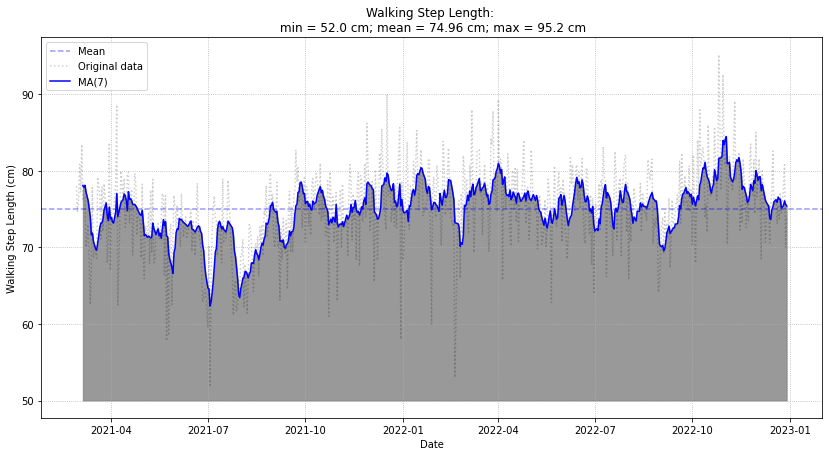

In [198]:
plt.figure(figsize=(14, 7))
plt.title(f"Walking Step Length: \n min = {step_length_min} cm; mean = {step_length_mean} cm; max = {step_length_max} cm")
plt.axhline(y = step_length_mean, color = "b", ls = "--", label = "Mean", alpha = 0.4)
plt.plot(dates_step, step_length, 'k:', label='Original data', alpha = 0.2)
plt.plot(dates_step, ma_step_length, 'b-', label='MA(7)')
plt.ylabel('Walking Step Length (cm)')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.fill_between(dates_step.values, 50, ma_step_length, color='grey', alpha=0.8)
plt.legend(loc='upper left')
plt.show()

In [199]:
steps_count = grouped_data_sum[grouped_data_sum["type"] == "StepCount"]["value"]
dates_step_c = grouped_data_sum[grouped_data_sum["type"] == "StepCount"]["date"]
ma_steps_count = steps_count.rolling(window=7).mean()
ma_steps_count_30 = steps_count.rolling(window=30).mean()

steps_count_min = round(steps_count.min(), 2)
steps_count_mean = round(steps_count.mean(), 2)
steps_count_max = round(steps_count.max(), 2)

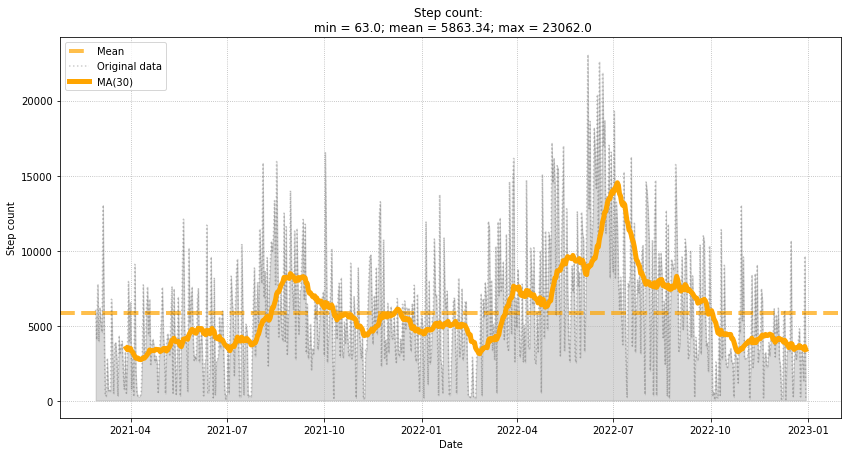

In [200]:
plt.figure(figsize=(14, 7))
plt.title(f"Step count: \n min = {steps_count_min}; mean = {steps_count_mean}; max = {steps_count_max}")
plt.axhline(y = steps_count_mean, color = "orange", ls = "--", lw = 4, label = "Mean", alpha = 0.7)
plt.plot(dates_step_c, steps_count, 'k:', label='Original data', alpha = 0.2)
plt.plot(dates_step_c, ma_steps_count_30, color = "orange", ls = "-", lw = 5, label='MA(30)')
plt.ylabel('Step count')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.fill_between(dates_step_c.values, 30, steps_count, color='grey', alpha=0.3)
plt.legend(loc='upper left')
plt.show()

In [201]:
distance = grouped_data_sum[grouped_data_sum["type"] == "DistanceWalkingRunning"]["value"]
dates_distance = grouped_data_sum[grouped_data_sum["type"] == "DistanceWalkingRunning"]["date"]
ma_distance_7 = distance.rolling(window=7).mean()
ma_distance_30 = steps_count.rolling(window=30).mean()

distance_min = round(distance.min(), 2)
distance_mean = round(distance.mean(), 2)
distance_max = round(distance.max(), 2)

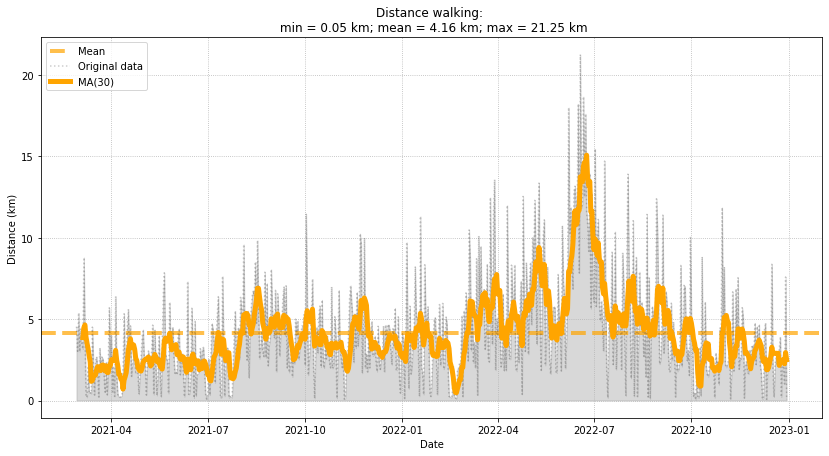

In [202]:
plt.figure(figsize=(14, 7))
plt.title(f"Distance walking: \n min = {distance_min} km; mean = {distance_mean} km; max = {distance_max} km")
plt.axhline(y = distance_mean, color = "orange", ls = "--", lw = 4, label = "Mean", alpha = 0.7)
plt.plot(dates_distance, distance, 'k:', label='Original data', alpha = 0.2)
plt.plot(dates_distance, ma_distance_7, color = "orange", ls = "-", lw = 5, label='MA(30)')
plt.ylabel('Distance (km)')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.fill_between(dates_distance.values, 0, distance, color='grey', alpha=0.3)
plt.legend(loc='upper left')
plt.show()

In [204]:
active_energy = grouped_data_sum[grouped_data_sum["type"] == "ActiveEnergyBurned"]["value"]
dates_active_energy = grouped_data_sum[grouped_data_sum["type"] == "ActiveEnergyBurned"]["date"]
ma_active_energy = active_energy.rolling(window=7).mean()

active_energy_min = round(active_energy.min(), 2)
active_energy_mean = round(active_energy.mean(), 2)
active_energy_max = round(active_energy.max(), 2)

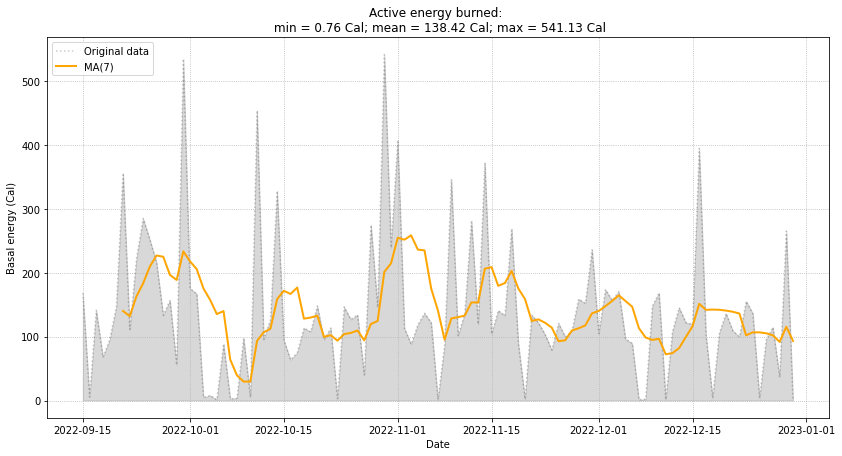

In [205]:
plt.figure(figsize=(14, 7))
plt.title(f"Active energy burned: \n min = {active_energy_min} Cal; mean = {active_energy_mean} Cal; max = {active_energy_max} Cal")
plt.plot(dates_active_energy, active_energy, 'k:', label='Original data', alpha = 0.2)
plt.plot(dates_active_energy, ma_active_energy, color = "orange", ls = "-", lw = 2, label='MA(7)')
plt.ylabel('Basal energy (Cal)')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.fill_between(dates_active_energy.values, 0, active_energy, color='grey', alpha=0.3)
plt.legend(loc='upper left')
plt.show()

In [206]:
basal_energy = grouped_data_sum[grouped_data_sum["type"] == "BasalEnergyBurned"]["value"]
dates_basal_energy = grouped_data_sum[grouped_data_sum["type"] == "BasalEnergyBurned"]["date"]
ma_basal_energy = basal_energy.rolling(window=7).mean()

basal_energy_min = round(basal_energy.min(), 2)
basal_energy_mean = round(basal_energy.mean(), 2)
basal_energy_max = round(basal_energy.max(), 2)

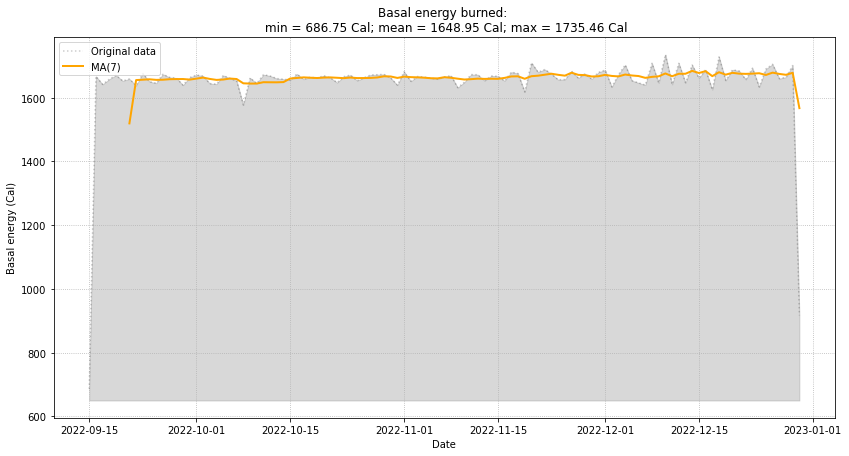

In [207]:
plt.figure(figsize=(14, 7))
plt.title(f"Basal energy burned: \n min = {basal_energy_min} Cal; mean = {basal_energy_mean} Cal; max = {basal_energy_max} Cal")
plt.plot(dates_basal_energy, basal_energy, 'k:', label='Original data', alpha = 0.2)
plt.plot(dates_basal_energy, ma_basal_energy, color = "orange", ls = "-", lw = 2, label='MA(7)')
plt.ylabel('Basal energy (Cal)')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.fill_between(dates_basal_energy.values, 650, basal_energy, color='grey', alpha=0.3)
plt.legend(loc='upper left')
plt.show()

In [208]:
double_support = grouped_data_mean[grouped_data_mean["type"] == "WalkingDoubleSupportPercentage"]["value"]
dates_ds = grouped_data_mean[grouped_data_mean["type"] == "WalkingDoubleSupportPercentage"]["date"]
ma_double_support = double_support.rolling(window=7).mean()

double_support_min = round(double_support.min(), 2)
double_support_mean = round(double_support.mean(), 2)
double_support_max = round(double_support.max(), 2)

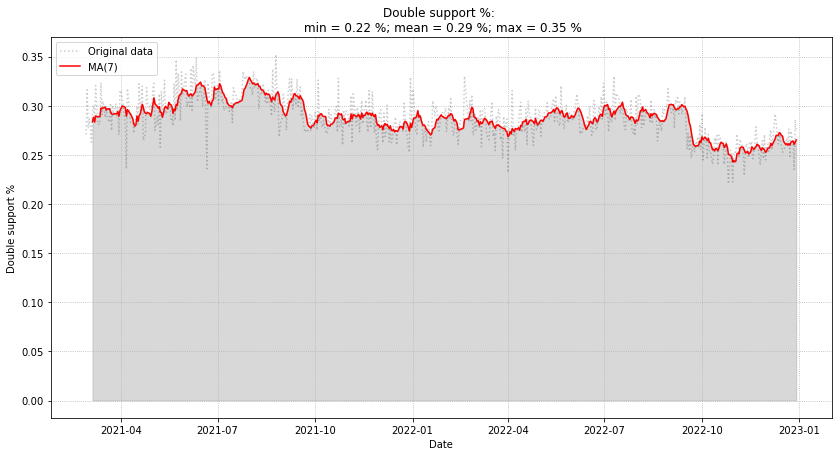

In [209]:
plt.figure(figsize=(14, 7))
plt.title(f"Double support %: \n min = {double_support_min} %; mean = {double_support_mean} %; max = {double_support_max} %")
plt.plot(dates_ds, double_support, 'k:', label='Original data', alpha = 0.2)
plt.plot(dates_ds, ma_double_support, 'r-', label='MA(7)')
plt.ylabel('Double support %')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.fill_between(dates_ds.values, 0, ma_double_support, color='grey', alpha=0.3)
plt.legend(loc='upper left')
plt.show()